# Analysis on Dataset "Dataset-vf"

<strong>The first step in our task to perform multiclass classification on the dataset [Dataset-vf](./Dataset-vf.csv) is preprocessing the dataset, this includes: </strong>
- Dataset analysis and report on important statistics
- Correlation analysis
- Dealing with missing values (if applicable)
- Dealing with imbalanced data (if applicable)
- Feature transformation/engineering
- List of appropriate evaluation measures with justifications


- [Observing the dataset](#Observing-the-dataset)
    - [Important Statisitcs](#Important-Statisitcs)
    - [Nature of the dataset](#Nature-of-the-dataset)
        - [Observing Features](#Observing-Features)
        - [Dealing with Missing Values](#Dealing-with-Missing-Values)
        - [Handling Imbalanced Data](#Handling-Imbalanced-Data)

## Observing the dataset
<strong>First we need to load the dataset, *report important statistic* on the numerical features and display the type of each feature before we can do further analysis.  </strong>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('Dataset-vf.csv')

### Important Statisitcs

In [42]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,5747.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.239603,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,105.619123,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,69.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,123.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,242.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


In [43]:
import missingno as msno

<AxesSubplot:>

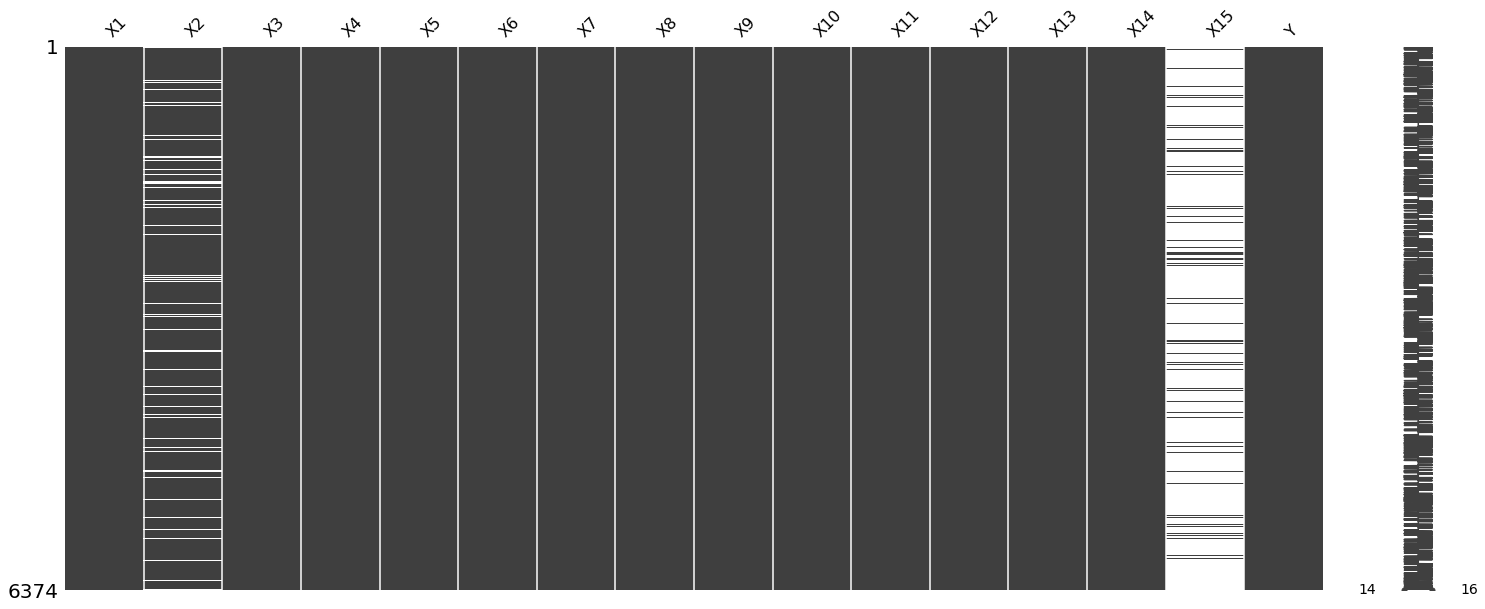

In [44]:
msno.matrix(data)

Visualization of Missing Values: white lines denote the presence of missing value

<hr>

### Nature of the dataset


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      5747 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  X15     631 non-null    object 
 15  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(4)
memory usage: 796.9+ KB


In [46]:
data['Y'].unique()

array(['Melon', 'Carrot', 'Orange', 'Apple', 'Berry', 'Mango', 'Peach'],
      dtype=object)

In [47]:
data['X2'].isna().sum()

627

In [48]:
data['X15'].isna().sum()

5743

#### Observing Features

##### Feature Types

- there are *15* features in total
- *12* are numerical features
- *3* are categorical


##### Target Feature

- target feature has 7 unique labels which are: ['Melon', 'Carrot', 'Orange', 'Apple', 'Berry', 'Mango', 'Peach']

<strong>Since the features of the dataset are kept anonymous ("X1" - "X15") it is difficult to adequately handle the preprocessing phase since there is no way to identify the nature of the feature.</strong>

<strong>However, looking at the target feature we can see that it is a fruit classification problem. Which will help us in the preprocessing phase. </strong>



#### Dealing with Missing Values

- Feature **"X15"** has *5743* missing values
- Feature **"X2"** has *627* missing values

##### Methods to handle Missing Values

<strong>These methods do not handle missing values the same, so proper justification should be given when a method is implemented</strong>
- Deleting Rows with missing values
- Deleting the feature
- Impute missing values with Mean/Median/Mode
- Replacing with Previous Value – Forward Fill
- Replacing with Next Value – Backward Fill
- [interpolation](https://blog.enterprisedna.co/handling-missing-data-in-python-using-interpolation-method/)
- Imputing using KNN
- [MICE Imputation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/)
 
Resources: 
- https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/
- https://pianalytix.com/how-do-you-handle-missing-values-categorical-data-and-feature-scaling-in-machine-learning/
- https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/
<hr>

##### Handling X15 feature
- has *5743* missing values
- categorical feature
- labels = [R, R1, R2, R3]

<strong>The best method to handle the missing values is to drop this feature.</strong>
<br>
The reasoning is as follows:
- the percentage of missing values is extremely high (at 90%)
- It's a categorical feature so there are not any straightforward statistical method to fill the missing values
- Looking at the unique labels I see that there are four {R, R1, R2, R3}. 
    I would hesitantly conclude that these categories don't make sense (why have R and R1).


In [49]:
data['X15'].isna().sum() / data.shape[0] * 100

90.10040790712269

In [50]:
modified_data = data.drop('X15', axis=1)
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      5747 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(3)
memory usage: 747.1+ KB


<strong>Now that we dropped feature *X15* we can focus on filling the missing values in feature *X2* </strong>

<hr>

##### Handling X2 feature
- has *627* missing values
- numerical feature
- {min, max} = {0, 360}
- median = 123
- mean = 153.23
<br>
<br>
<strong>Methods to consider: </strong>

<br>

- <strong>Deleting rows that have missing values might be a good approach if we have an extremely small percentage 
    (<5%) but since feature "X2" has almost 10% of its values missing, this approach will significantly reduce the dataset (which is already kind of small at 6374 entries) </strong>

- <strong> Deleting the feature be a good approach if we have an extremely large percentage (>50%)   but since feature "X2" has almost 10% of its values missing, this approach will significantly reduce the capability of the model to accurately predict. </strong> 
    
- <strong>We can fill the missing values with the median or mean or mode. However, none of these methods take into account the covariance between features. Furthermore, these methods might skew the results a bit (it is a great approach but today we have more accurate methods) </strong>
    
- <strong> imputing with KNN seems like a good option since it takes into account other features. So it will be an option that we will use   </strong>

- <strong>imputing with Multiple Imputation by Chained Equations (MICE) is also a good option as it also considers other features while imputing. Furthermore, It factors in the correlation between the features</strong>


<br>
    

<p>We will now impute the missing data using KNN and MICE and see which one performs better. our criteria includes:  </p>

- should not modify the max and min values (the feature range: [0,360]. makes us suspect that it has to do with degrees, so we would not want it to modify these values)
- should not significantly change other statisitcs displayed in the original data.

In [51]:
modified_data['X2'].isna().sum() / modified_data.shape[0] * 100

9.836837150925636

In [52]:
modified_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,5747.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.239603,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,105.619123,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,69.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,123.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,242.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


##### KNN Imputer

In [53]:
from sklearn.impute import KNNImputer

KNN_imputer = KNNImputer(n_neighbors=5, weights='distance')
KNN_imputed_dataset = KNN_imputer.fit_transform(modified_data.drop(['X13', 'X14', 'Y'], axis=1))
KNN_imputed_dataset = pd.DataFrame(KNN_imputed_dataset, columns=modified_data.columns[0:12])
KNN_imputed_dataset.insert(KNN_imputed_dataset.shape[1], "X13",modified_data['X13'], False )
KNN_imputed_dataset.insert(KNN_imputed_dataset.shape[1], "X14",modified_data['X14'], False )

KNN_imputed_dataset.insert(KNN_imputed_dataset.shape[1], "Y",modified_data['Y'], False )
KNN_imputed_dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,152.626027,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,102.148426,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,73.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,125.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,230.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


C:\Users\ubi-A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2'>

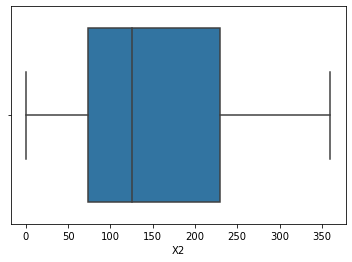

In [54]:
sns.boxplot(KNN_imputed_dataset['X2'])

<hr>

###### MICE Imputer

In [55]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

MICE_imputer = IterativeImputer(imputation_order='random',max_iter=10,random_state=777,n_nearest_features=None)
MICE_imputed_dataset = MICE_imputer.fit_transform(modified_data.drop(['X13', 'X14', 'Y'], axis=1))
MICE_imputed_dataset = pd.DataFrame(MICE_imputed_dataset, columns=modified_data.columns[0:12])
MICE_imputed_dataset.insert(MICE_imputed_dataset.shape[1], "X13",modified_data['X13'], False )
MICE_imputed_dataset.insert(MICE_imputed_dataset.shape[1], "X14",modified_data['X14'], False )

MICE_imputed_dataset.insert(MICE_imputed_dataset.shape[1], "Y",modified_data['Y'], False )
MICE_imputed_dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.189977,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,103.090856,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,-6.432247,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,73.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,125.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,232.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,434.467270,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


C:\Users\ubi-A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2'>

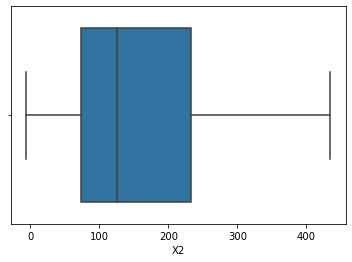

In [56]:
sns.boxplot(MICE_imputed_dataset['X2'])

In [57]:
cleaned_data = KNN_imputed_dataset.copy()
cleaned_data.to_csv('new_dataset-vf.csv', index=False)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   float64
 1   X2      6374 non-null   float64
 2   X3      6374 non-null   float64
 3   X4      6374 non-null   float64
 4   X5      6374 non-null   float64
 5   X6      6374 non-null   float64
 6   X7      6374 non-null   float64
 7   X8      6374 non-null   float64
 8   X9      6374 non-null   float64
 9   X10     6374 non-null   float64
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   float64
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  Y       6374 non-null   object 
dtypes: float64(12), object(3)
memory usage: 747.1+ KB


#### Conclusion 

<strong>Based on our criteria KNN did not change the max and min values of the feature, hence we will impute using KNN </strong>

<hr>


Now with we handled all the missing values, we can do correlation analysis


#### Correlation Analysis

- we will be using the `corr` function which has three methods:
    - [spearman](

<AxesSubplot:title={'center':'spearman'}>

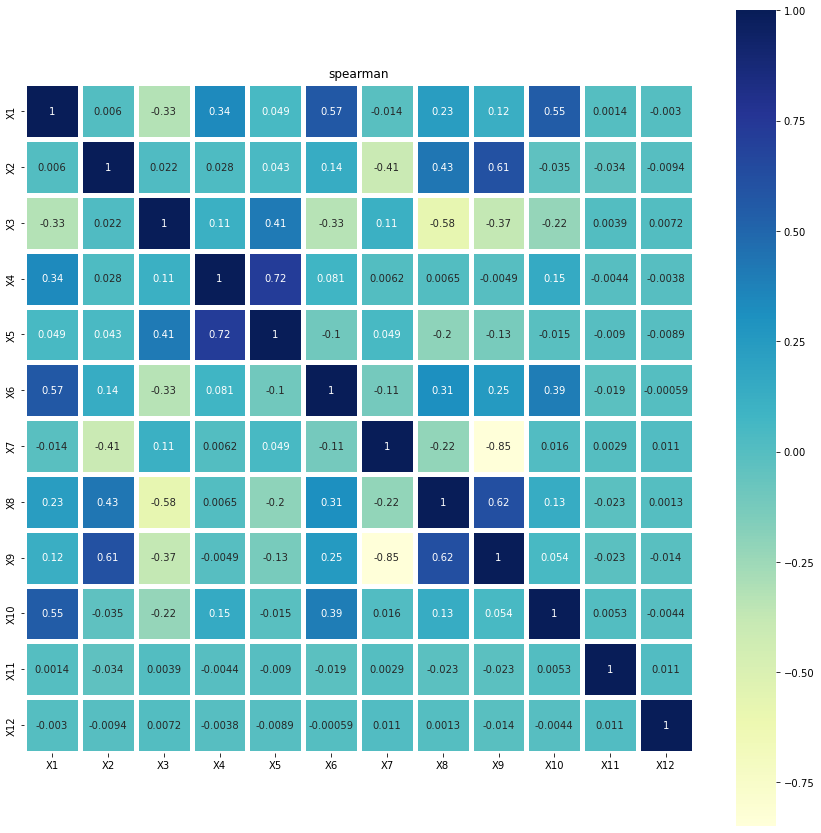

In [58]:
plt.subplots(figsize=(15, 15))
plt.title('spearman')
sns.heatmap(cleaned_data.corr(method='spearman'),annot=True, linewidths=5, cmap='YlGnBu', square=True)

<AxesSubplot:title={'center':'Kendall'}>

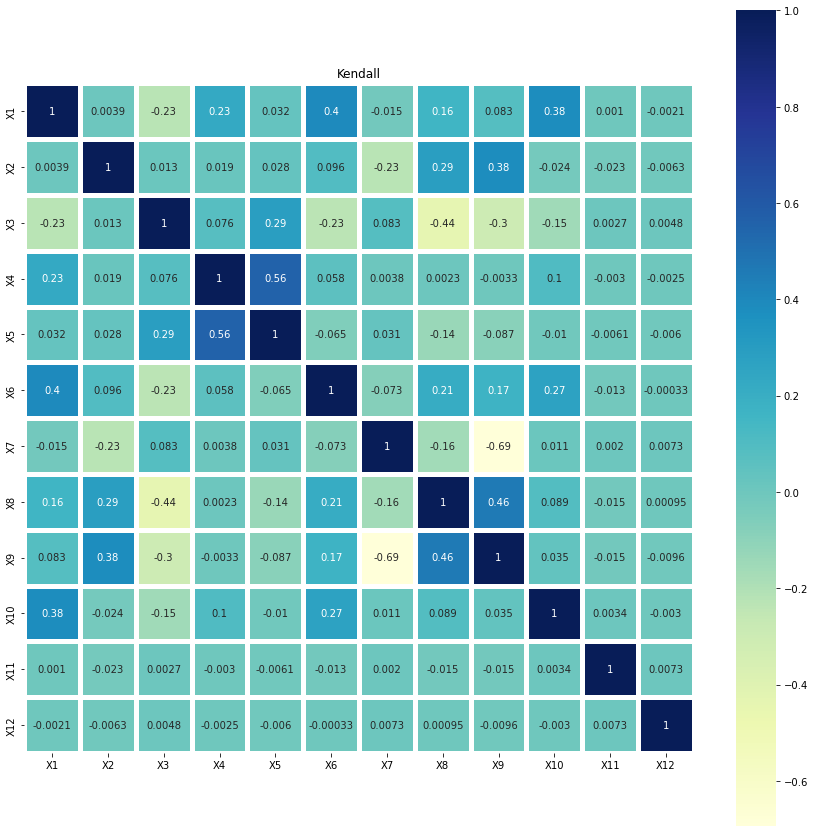

In [59]:
plt.subplots(figsize=(15, 15))
plt.title('Kendall')
sns.heatmap(cleaned_data.corr(method='kendall'),annot=True, linewidths=5, cmap='YlGnBu', square=True)

<AxesSubplot:title={'center':'pearson'}>

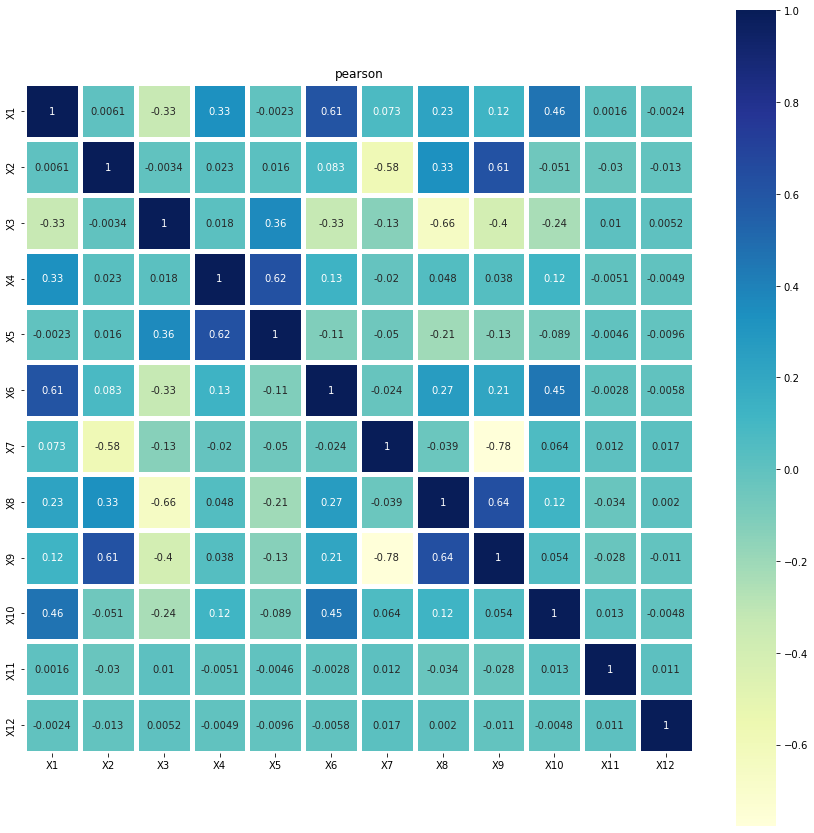

In [60]:
plt.subplots(figsize=(15, 15))
plt.title('pearson')
sns.heatmap(cleaned_data.corr(method='pearson'),annot=True, linewidths=5, cmap='YlGnBu', square=True)




<hr>

#### Handling Imbalanced Data

- `Mango` class only has *250* samples (3.9%)
- `Orange` class only has *100* samples (1.5%)
- `Peach` class only has *308* samples (4.8%)

<strong>we will perform a combination of oversampling and undersampling for the following reasons:</strong>
- ideally the probabilty of a  class should be `1/n` where `n` is the number of classes
- since the dataset is of a decent size we should not only remove samples of majority classes as it would significantly shrink the dataset
- increasing minorty class samples might lead to oversampling. Furthermore, we will be using models like Random Forest that tackles this problem

<strong>Now to pick the techniques of both oversampling and undersampling:</strong>

##### Undersampling

Undersampling techniques eliminate some examples from the training data set belonging to majority classes. 

some techniques to consider:

- **Near Miss Undersampling**: This technique selects the data points based on the distance between majority and minority class examples. It has three versions of itself, and each of these considers the different neighbors from the majority class.


- **Condensed Nearest Neighbor (CNN) Undersampling**: This technique aspires to a subset of a collection of samples that minimizes the model loss. These examples are stores in a store that then consists of examples from the minority class and incorrectly classified examples from the majority class.


- **Tomek Links Undersampling**: This technique is the modified version of CNN in which the redundant examples get selected randomly for deletion from the majority class. These examples are rather internal than near the decision boundary.


- **Edited Nearest Neighbors Undersampling**: This technique uses the nearest neighbors approach and deletes according to the misclassification of the samples. It computes three nearest neighbors for each instance. If the example of a majority class and misclassified by these three neighbors. Then it removes that instance.


we will be using **Near Miss Undersampling** version 3 since it is more accurate since it considers examples of the majority class that are on the decision boundary.

- Version 3 keeps examples from the majority class for each closest record in the minority class.

##### Undersampling

Unlike Undersampling, which focuses on removing the majority class examples, Oversampling focuses on increasing minority class samples.

some techniques to consider:

- **SMOTE**: stands for Synthetic Minority Oversampling Technique. SMOTE selects the nearest examples in the feature space, then draws a line between them, and at a point along the line, it creates a new sample.


- **Borderline-SMOTE**: This SMOTE extension selects the minority class instance that is misclassified with a k-nearest neighbor (KNN) classifier. Since borderline or distant examples are more tend to misclassified.


- **Borderline-SMOTE SVM**: This method selects the misclassified instances of Support Vector Machine (SVM) instead of KNN.


- **Adaptive Synthetic Sampling (ADASYN)**: This approach works according to the density of the minority class instances. Generating new samples is inversely proportional to the density of the minority class samples.


We will be using **Borderline-SMOTE** since we don't want to expand the dataset too much. Furthermore, the choice between KNN and SVM comes down to time.



In [61]:
labels, labels_count = np.unique(data['Y'], return_counts=True)
print(np.asarray((labels,labels_count)))
print(np.asarray((labels,labels_count / np.sum(labels_count))))

[['Apple' 'Berry' 'Carrot' 'Mango' 'Melon' 'Orange' 'Peach']
 [1275 1250 1620 250 1571 100 308]]
[['Apple' 'Berry' 'Carrot' 'Mango' 'Melon' 'Orange' 'Peach']
 [0.20003137747097585 0.19610919359899592 0.2541575149042987
  0.03922183871979919 0.24647003451521807 0.015688735487919672
  0.04832130530279259]]


In [66]:
cleaned_data[

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,2709.0,59.000000,11.0,120.0,43.0,150.0,228.0,217.0,120.0,2114.0,0.66,269.0,FC11,CA49,Melon
1,2802.0,54.000000,7.0,0.0,0.0,693.0,224.0,225.0,136.0,162.0,0.35,195.0,FC11,CA50,Melon
2,2325.0,28.000000,12.0,0.0,0.0,1260.0,215.0,213.0,133.0,162.0,0.89,750.0,FC14,CA26,Carrot
3,2837.0,112.000000,8.0,272.0,16.0,3649.0,235.0,231.0,128.0,6221.0,0.27,-155.0,FC11,CA32,Orange
4,2509.0,59.000000,7.0,134.0,10.0,900.0,226.0,226.0,134.0,5184.0,0.93,88.0,FC11,CA38,Melon
5,2892.0,75.000000,7.0,95.0,9.0,1889.0,228.0,228.0,133.0,2371.0,0.79,39.0,FC13,CA42,Apple
6,2848.0,222.129013,15.0,819.0,91.0,2190.0,181.0,245.0,203.0,1717.0,0.98,-408.0,FC13,CA37,Melon
7,2380.0,130.000000,27.0,228.0,139.0,300.0,252.0,212.0,69.0,1855.0,0.51,231.0,FC14,CA23,Carrot
8,3208.0,0.000000,9.0,124.0,-2.0,5394.0,206.0,222.0,154.0,900.0,0.97,-740.0,FC11,CA42,Apple
9,2273.0,357.000000,12.0,30.0,3.0,658.0,201.0,218.0,155.0,698.0,0.48,648.0,FC14,CA24,Berry


In [67]:
from imblearn.under_sampling import NearMiss
from collections import Counter
undersampling = NearMiss(sampling_strategy='not minority', version=3)
X, Y = undersampling.fit_resample(cleaned_data.drop('Y', axis=1), cleaned_data['Y'])
print(Counter(Y))

ValueError: could not convert string to float: ' FC11'

In [198]:
pd.DataFrame(data=labels_count, index=labels)

,0
Apple,1275
Berry,1250
Carrot,1620
Mango,250
Melon,1571
Orange,100
Peach,308


In [10]:
data['X13'].unique()

array([' FC11', ' FC14', ' FC13', ' FC12'], dtype=object)

In [7]:
data['X14'].unique()

array([' CA49', ' CA50', ' CA26', ' CA32', ' CA38', ' CA42', ' CA37',
       ' CA23', ' CA24', ' CA21', ' CA43', ' CA22', ' CA36', ' CA33',
       ' CA44', ' CA59', ' CA30', ' CA40', ' CA51', ' CA52', ' CA31',
       ' CA58', ' CA25', ' CA39', ' CA53', ' CA60', ' CA46', ' CA54',
       ' CA34', ' CA41', ' CA48', ' CA55'], dtype=object)

In [11]:
data['X15'].unique()

array(['R1', nan, 'R2', 'R3', 'R'], dtype=object)

array(['Melon', 'Carrot', 'Orange', 'Apple', 'Berry', 'Mango', 'Peach'],
      dtype=object)